In [ ]:
import cv2
import numpy as np

In [ ]:
#!unzip data.zip


Streaming output truncated to the last 5000 lines.
  inflating: data/Dataset 1.0/train/Mountains/M2_1275.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1276.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1277.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1278.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1279.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_128.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1280.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1281.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1282.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1283.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1284.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1285.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1286.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1287.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1288.jpg  
  inflating: data/Dataset 1.0/train/Mountains/M2_1

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

img_size = (256, 256)
batch_size = 32
epochs = 3

dataset_folder = '/content/data/Dataset 1.0/train'
test_folder='/content/data/Dataset 1.0/test'

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    test_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

model.save('land_use_classifier_model.h5')

loss, accuracy = model.evaluate(validation_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')



Found 6245 images belonging to 5 classes.
Found 297 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 35s 128ms/step - accuracy: 0.6493 - loss: 0.8311 - val_accuracy: 0.9529 - val_loss: 0.1438
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - accuracy: 0.9649 - loss: 0.1026 - val_accuracy: 0.9865 - val_loss: 0.0407
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.9675 - loss: 0.0990 - val_accuracy: 0.9663 - val_loss: 0.0733


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.9631 - loss: 0.0664
Test Loss: 0.07334381341934204, Test Accuracy: 0.9663299918174744


In [ ]:
def classify_image(image_path, model):

    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} could not be found or opened.")

    image = cv2.resize(image, img_size)

    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)

    predictions = model.predict(image)
    class_index = np.argmax(predictions, axis=1)[0]

    return class_index



new_image_path = '/content/data/Dataset 1.0/train/Deserts/D2_100.jpg'
class_names = ['Desert', 'Forest Cover', 'Mountains', 'Urban','Water bodies']
try:
    class_index = classify_image(new_image_path, model)
    print(f'Predicted class index: {class_names[class_index]}')
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
Predicted class index: Mountains


In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.9785 - loss: 0.0548
Test Loss: 0.07334380596876144, Test Accuracy: 0.9663299918174744


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /content/data/Dataset 1.0/train/Deserts/D2_1006.jpg, Predicted class: Water bodies


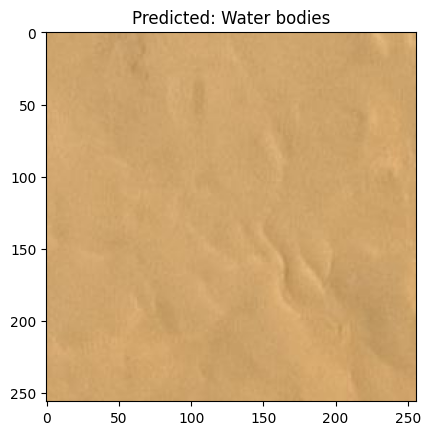

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: /content/data/Dataset 1.0/train/Forest Cover/F2_1004.jpg, Predicted class: Water bodies


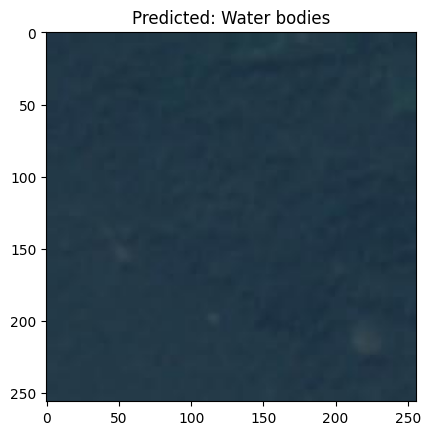

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: /content/data/Dataset 1.0/validation/Urban/609.jpg, Predicted class: Urban


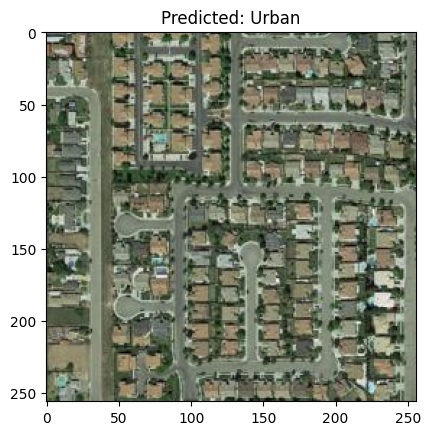

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: /content/data/Dataset 1.0/validation/Forest Cover/F3_115.jpg, Predicted class: Water bodies


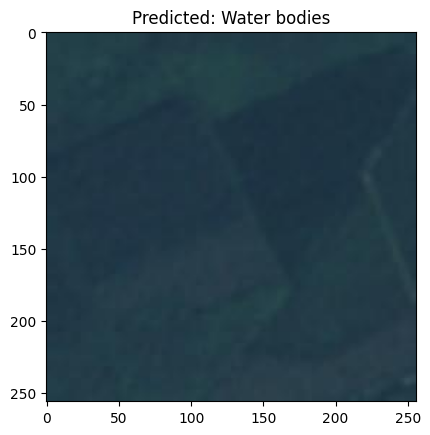

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: /content/data/Dataset 1.0/train/Mountains/M2_1007.jpg, Predicted class: Urban


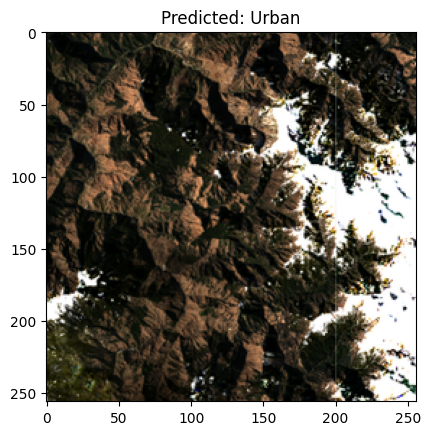

In [ ]:
import matplotlib.pyplot as plt

class_names = ['Desert', 'Forest Cover', 'Mountains', 'Urban','Water bodies']
def visualize_predictions(image_paths, model):
    for image_path in image_paths:
        class_name = classify_image(image_path, model)
        print(f'Image: {image_path}, Predicted class: {class_names[class_name]}')
        image = cv2.imread(image_path)
        image = cv2.resize(image, img_size)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f'Predicted: {class_names[class_name]}')
        plt.show()

image_paths = ['/content/data/Dataset 1.0/train/Deserts/D2_1006.jpg', '/content/data/Dataset 1.0/train/Forest Cover/F2_1004.jpg', '/content/data/Dataset 1.0/validation/Urban/609.jpg', '/content/data/Dataset 1.0/validation/Forest Cover/F3_115.jpg', '/content/data/Dataset 1.0/train/Mountains/M2_1007.jpg']
visualize_predictions(image_paths, model)
